# Why is everything broken a lot? A Retrospective

I want to check that I can retrieve the same image and WCS from the large ATLAS image as I can from a subject image.

In [1]:
import sys

sys.path.insert(1, '..')
import crowdastro.rgz_data as data
from crowdastro.config import config
import astropy.wcs
import astropy.io.fits
import matplotlib.pyplot as plt

FITS_CONVENTION = 1
%matplotlib inline

In [103]:
subject = data.get_random_subject()

In [104]:
with astropy.io.fits.open(config['data_sources']['atlas_image'],
                              ignore_blank=True) as atlas_image:
    wcs = astropy.wcs.WCS(atlas_image[0].header).dropaxis(3).dropaxis(2)

K:\Languages\Python35_64\lib\site-packages\astropy\io\fits\util.py:578: UserWarning: Could not find appropriate MS Visual C Runtime library or library is corrupt/misconfigured; cannot determine whether your file object was opened in append mode.  Please consider using a file object opened in write mode instead.
  'Could not find appropriate MS Visual C Runtime '


In [127]:
# offset, = wcs.all_world2pix([subject['coords']], FITS_CONVENTION)
# offset[0] -= (200 * 0.4) // 2
# offset[1] -= (200 * 0.4) // 2
offset = (6836.48263053, 2803.72734067)

In [128]:
print(offset)
print((200 * 0.4) // 2)

(6836.48263053, 2803.72734067)
40.0


In [129]:
with astropy.io.fits.open(config['data_sources']['atlas_image'],
                              ignore_blank=True) as atlas_image:
    patch = atlas_image[0].data[0, 0, offset[1] : offset[1] + 200 * 0.4,
                                offset[0] : offset[0] + 200 * 0.4]

K:\Languages\Python35_64\lib\site-packages\astropy\io\fits\util.py:578: UserWarning: Could not find appropriate MS Visual C Runtime library or library is corrupt/misconfigured; cannot determine whether your file object was opened in append mode.  Please consider using a file object opened in write mode instead.
  'Could not find appropriate MS Visual C Runtime '
K:\Languages\Python35_64\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


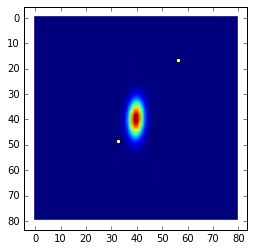

In [135]:
plt.imshow(patch)
plt.scatter([32.744630123304894, 80-23.793079032324172], [48.574627826236345, 80-63.37433811509573], c='white')

K:\Languages\Python35_64\lib\site-packages\astropy\io\fits\util.py:578: UserWarning: Could not find appropriate MS Visual C Runtime library or library is corrupt/misconfigured; cannot determine whether your file object was opened in append mode.  Please consider using a file object opened in write mode instead.
  'Could not find appropriate MS Visual C Runtime '


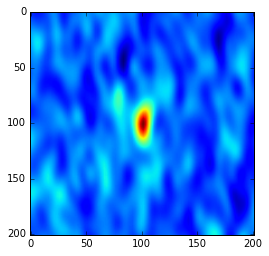

In [109]:
radio = data.get_radio(subject, size='2x2')
plt.imshow(radio)